In [1]:
import shutil
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
def get_model_paths(folder_path):
    model_paths = []
    for filename in os.listdir(folder_path):
        if filename != ".DS_Store":
            if os.path.isfile(os.path.join(folder_path, filename)):
                path = folder_path + filename
                model_paths.append(path)
    return model_paths

def choose_best_model(model_paths):
    best_model_path = None
    best_accuracy = 0
    best_gap = 100
    for path in model_paths:
        with open(path, 'rb') as f:
            model = pickle.load(f)
        avg_acc_test = np.mean(model["avg_acc_test"])
        avg_acc_train = np.mean(model["avg_acc_train"])
        gap = abs(avg_acc_test - avg_acc_train)
        if avg_acc_test > best_accuracy or (avg_acc_test == best_accuracy and gap < best_gap):
            best_model_path = path
            best_accuracy = avg_acc_test
            best_gap = gap
    return best_model_path

In [3]:
models = get_model_paths("./pretrained_models/")

In [4]:
best_model = choose_best_model(models)


In [10]:
file = open(best_model,'rb')
best_model = pickle.load(file)

file.close()

Text(0, 0.5, 'Acc')

Text(0.5, 0, 'Epoch')

([<matplotlib.axis.XTick at 0x7f88e5f24880>,
 [Text(0.0, 0, '1'),
  Text(3.0, 0, '4'),
  Text(6.0, 0, '7'),
  Text(9.0, 0, '10'),
  Text(12.0, 0, '13'),
  Text(15.0, 0, '16'),
  Text(18.0, 0, '19'),
  Text(21.0, 0, '22'),
  Text(24.0, 0, '25'),
  Text(27.0, 0, '28'),
  Text(30.0, 0, '31'),
  Text(33.0, 0, '34'),
  Text(36.0, 0, '37'),
  Text(39.0, 0, '40'),
  Text(42.0, 0, '43'),
  Text(45.0, 0, '46'),
  Text(48.0, 0, '49'),
  Text(51.0, 0, '52'),
  Text(54.0, 0, '55'),
  Text(57.0, 0, '58'),
  Text(60.0, 0, '61'),
  Text(63.0, 0, '64'),
  Text(66.0, 0, '67'),
  Text(69.0, 0, '70')])

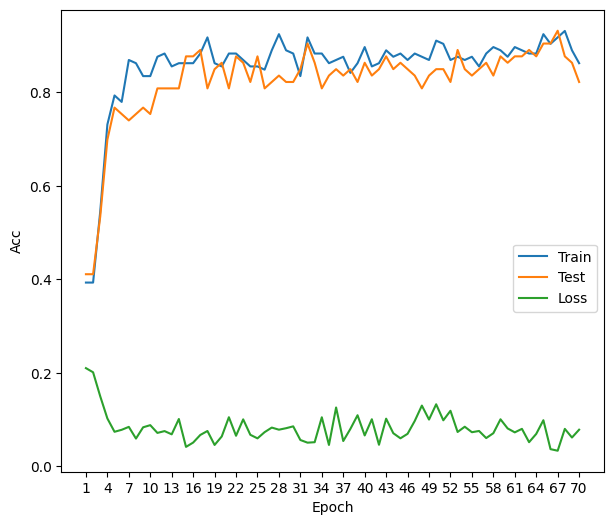

In [24]:
fig = plt.figure(figsize=(7,6))
plt.plot(np.asarray(np.arange(best_model["epochs"]) + 1).astype("str"), best_model["avg_acc_train"])
plt.plot(np.asarray(np.arange(best_model["epochs"]) + 1).astype("str"), best_model["avg_acc_test"])
plt.plot(np.asarray(np.arange(best_model["epochs"]) + 1).astype("str"), best_model["loss_tests"])

plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.xticks(np.asarray(np.arange(best_model["epochs"]) + 1).astype("str")[::3])
fig.legend(labels=['Train','Test', 'Loss'], bbox_to_anchor=(0, 0, 0.9, 0.5))